# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [1]:
# imports
import plotly.express as px
import panel as pn
pn.extension('plotly')

import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

## Load Data

In [3]:
# Read the San Francisco real estate data from year 2010 through 2016 into a Pandas DataFrame
file_path = Path("./Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")

#drop any rows with NULL (NaN) values to clean up the dataset
sfo_data.dropna(inplace=True)

#Verify the data is loaded in the dataframe
sfo_data

neighborhood  sale_price_sqr_foot  housing_units  gross_rent
year                                                                        
2010            Alamo Square           291.182945         372560        1239
2010              Anza Vista           267.932583         372560        1239
2010                 Bayview           170.098665         372560        1239
2010        Buena Vista Park           347.394919         372560        1239
2010        Central Richmond           319.027623         372560        1239
...                      ...                  ...            ...         ...
2016          Telegraph Hill           903.049771         384242        4390
2016              Twin Peaks           970.085470         384242        4390
2016  Van Ness/ Civic Center           552.602567         384242        4390
2016       Visitacion Valley           328.319007         384242        4390
2016           Westwood Park           631.195426         384242        4390

[392 rows x 4 columns]

- - - 

In [4]:
## Housing Units Per Year

In [5]:
# Calculate the average number of housing units sold per year using groupby function 
num_housing_units = pd.DataFrame(sfo_data['housing_units'].groupby([sfo_data.index]).mean())
#verify the dataset
num_housing_units

housing_units
year               
2010       372560.0
2011       374507.0
2012       376454.0
2013       378401.0
2014       380348.0
2015       382295.0
2016       384242.0

In [6]:
# Save the dataframe as a csv file
num_housing_units.to_csv(r'./Data/num_housing_units.csv')

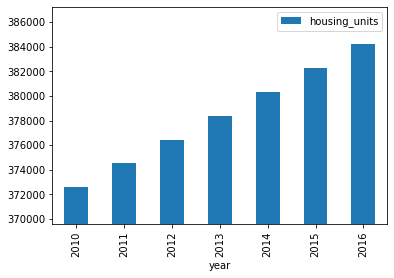

In [7]:
# Use the Pandas plot function to plot the average housing units per year.
min = num_housing_units['housing_units'].min()
max = num_housing_units['housing_units'].max()

# Adjust the y limit of the chart using the min and max values -/+3000 from above and then plot the bar chart
plot_housing_units = num_housing_units.plot.bar( y='housing_units',ylim = (min - 3000, max + 3000))

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [9]:
# Calculate the average sale price per square foot and average gross rent
average_per_sqft = pd.DataFrame(sfo_data['sale_price_sqr_foot'].groupby([sfo_data.index]).mean())
average_rent = pd.DataFrame(sfo_data['gross_rent'].groupby([sfo_data.index]).mean())

#Combine the two dataframes using pandas concatenate function
comb_avg_rent_per_sf = pd.concat([average_per_sqft,average_rent], axis =1, join='inner')

#Rename the columns
comb_avg_rent_per_sf.columns = ['Average_SF_Price', 'Avereage_Gross_Rent']

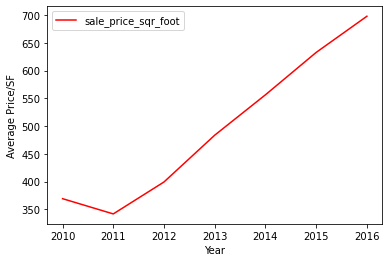

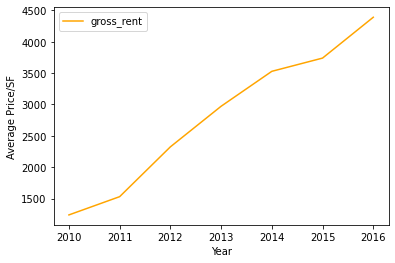

In [10]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

# Line chart for average sale price per square foot
plot_avg_sale_price = average_per_sqft.plot.line(ylabel = 'Average Price/SF', xlabel = 'Year', color = 'RED') 

# Line chart for average montly rent
plot_avg_gross_rent = average_rent.plot.line(ylabel = 'Average Price/SF', xlabel = 'Year', color = 'ORANGE') 

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [11]:
# Group by year and neighborhood and then create a new dataframe of the mean values
average_price_per_sf = sfo_data.groupby(['year','neighborhood']).mean()
average_price_per_sf

sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                          
2010 Alamo Square                     291.182945       372560.0      1239.0
     Anza Vista                       267.932583       372560.0      1239.0
     Bayview                          170.098665       372560.0      1239.0
     Buena Vista Park                 347.394919       372560.0      1239.0
     Central Richmond                 319.027623       372560.0      1239.0
...                                          ...            ...         ...
2016 Telegraph Hill                   903.049771       384242.0      4390.0
     Twin Peaks                       970.085470       384242.0      4390.0
     Van Ness/ Civic Center           552.602567       384242.0      4390.0
     Visitacion Valley                328.319007       384242.0      4390.0
     Westwood Park                    631.195426       384242.0      4390.0

[392 rows x 3 columns]

In [12]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# Groupby neighborhood creates a dropdown selector for the neighborhoods
plot_avg_sale_price = average_price_per_sf.hvplot.line(
                            x='year',
                            y='sale_price_sqr_foot',
                            xlabel='Year',
                            ylabel='Average Sales Price',
                            groupby='neighborhood'
)
plot_avg_sale_price

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [13]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# Groupby neighborhood creates a dropdown selector for the neighborhoods
plot_avg_rent = average_price_per_sf.hvplot.line(
                            x='year',
                            y='gross_rent',
                            xlabel='Year',
                            ylabel='Average Monthly Rent',
                            groupby='neighborhood'
)
plot_avg_rent

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

In [14]:
## The Top 10 Most Expensive Neighborhoods
#In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then 
#sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

# Getting the data from the top 10 expensive neighborhoods to own
neighborhood_avg_price_per_sf = sfo_data.groupby(['neighborhood']).mean()

#sort the average sale price per foot in descending order to get the most expensive neighborhoods
neighborhood_avg_price_per_sf = neighborhood_avg_price_per_sf.sort_values('sale_price_sqr_foot', ascending=False)

#Get the first ten rows to get plot 10 most expensive neighborhoods
ten_most_expensive_neighbohoods = neighborhood_avg_price_per_sf.head(10).reset_index()
#ten_most_expensive_neighbohoods

In [15]:
# Plot the data from the top 10 expensive neighborhoods using hvplot
top_10_expensive_neighborhoods = ten_most_expensive_neighbohoods.hvplot.bar(
                                            x='neighborhood',
                                            y='sale_price_sqr_foot',
                                            xlabel='Neighborhoods',
                                            ylabel='Average sales price',
                                            title='10 Most Expensive Neighborhoods in San Francisco',
                                            height = 450,
                                            rot=45)
top_10_expensive_neighborhoods

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [16]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood for side by side sales and rent comparison
plot_avg_sale_price = average_price_per_sf.hvplot.bar(
                                                        x='year', 
                                                        y=['sale_price_sqr_foot', 'gross_rent'],
                                                        groupby ='neighborhood',
                                                        xlabel='Year',
                                                        ylabel='Average Sales Price/SF vs Average Gross Renat',                                                        
                                                        title='Average Sale Price Per SF',
                                                        width=800, height=600, rot=90
                                                    ) 
plot_avg_sale_price

:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

In [17]:
# Plotting the data from the top 10 expensive neighborhoods

plot_avg_sale_price_10 = ten_most_expensive_neighbohoods.hvplot.bar(
                                                        x='neighborhood', 
                                                        y='sale_price_sqr_foot', 
                                                        xlabel='Neighborhood',
                                                        ylabel='Average Sales Price Per SF',                                                        
                                                        title='Average Sale Price Per SF',
                                                        width=600, height=400, rot=45
                                                    ) 
plot_avg_sale_price_10

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [18]:
# Load neighborhoods coordinates data from neighborhoods_coordinates.csv
location_file_path = Path("./Data/neighborhoods_coordinates.csv")
neighborhood_location_data = pd.read_csv(location_file_path)
neighborhood_location_data

Neighborhood        Lat         Lon
0         Alamo Square  37.791012 -122.402100
1           Anza Vista  37.779598 -122.443451
2              Bayview  37.734670 -122.401060
3      Bayview Heights  37.728740 -122.410980
4       Bernal Heights  37.728630 -122.443050
..                 ...        ...         ...
68         West Portal  37.740260 -122.463880
69    Western Addition  37.792980 -122.435790
70  Westwood Highlands  37.734700 -122.456854
71       Westwood Park  37.734150 -122.457000
72         Yerba Buena  37.792980 -122.396360

[73 rows x 3 columns]

### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [19]:
# Calculate the mean values for each neighborhood
neighborhood_mean = sfo_data.groupby('neighborhood').mean()
#reseting the index gives us the index as a column to use it to plot the charts
neighborhood_mean.reset_index(inplace=True)

In [20]:
# Join the average values with the neighborhood locations
comb_loc_mean_data = pd.concat([neighborhood_location_data,
                                neighborhood_mean['sale_price_sqr_foot'],
                                neighborhood_mean['housing_units'],
                                neighborhood_mean['gross_rent']], axis=1).dropna()
comb_loc_mean_data

Neighborhood        Lat         Lon  sale_price_sqr_foot  \
0         Alamo Square  37.791012 -122.402100           366.020712   
1           Anza Vista  37.779598 -122.443451           373.382198   
2              Bayview  37.734670 -122.401060           204.588623   
3      Bayview Heights  37.728740 -122.410980           590.792839   
4       Bernal Heights  37.728630 -122.443050           576.746488   
..                 ...        ...         ...                  ...   
68         West Portal  37.740260 -122.463880           498.488485   
69    Western Addition  37.792980 -122.435790           307.562201   
70  Westwood Highlands  37.734700 -122.456854           533.703935   
71       Westwood Park  37.734150 -122.457000           687.087575   
72         Yerba Buena  37.792980 -122.396360           576.709848   

    housing_units   gross_rent  
0       378401.00  2817.285714  
1       379050.00  3031.833333  
2       376454.00  2318.400000  
3       382295.00  3739.000000  
4       379374.50  3080.333333  
..            ...          ...  
68      376940.75  2515.500000  
69      377427.50  2555.166667  
70      376454.00  2250.500000  
71      382295.00  3959.000000  
72      377427.50  2555.166667  

[73 rows x 6 columns]

### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

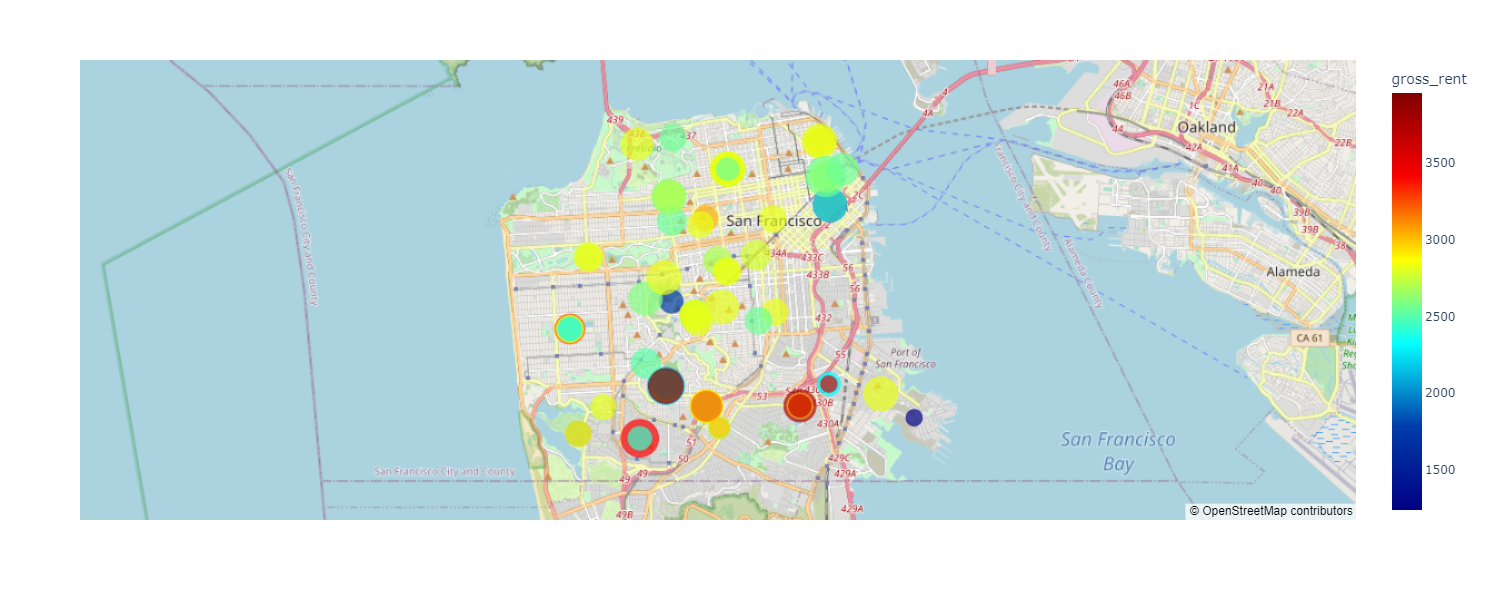

In [21]:
# Set the mapbox access token
# Plot Data
map_plot = px.scatter_mapbox(
    comb_loc_mean_data,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    hover_name="Neighborhood",
    color_continuous_scale=px.colors.sequential.Jet,
    size_max=30,
    height=600, 
    width=1200,
    mapbox_style="open-street-map",
    zoom=11
)

# Create a scatter mapbox to analyze neighborhood info
# Display the map
map_plot.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [27]:
# Fetch the data from all expensive neighborhoods per year.
all_data_for_expensive_neighbohoods = sfo_data[sfo_data["neighborhood"].isin(ten_most_expensive_neighbohoods["neighborhood"])]
all_data_for_expensive_neighbohoods.sort_values('sale_price_sqr_foot', ascending=False, inplace=True)
all_data_for_expensive_neighbohoods.head()

neighborhood  sale_price_sqr_foot  housing_units  gross_rent
year                                                                       
2015  Union Square District          2258.702832         382295        3739
2016       Presidio Heights          1465.968586         384242        4390
2016         Merced Heights          1416.666667         384242        4390
2013  Union Square District          1290.472107         378401        2971
2014          Miraloma Park          1267.766203         380348        3528

### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


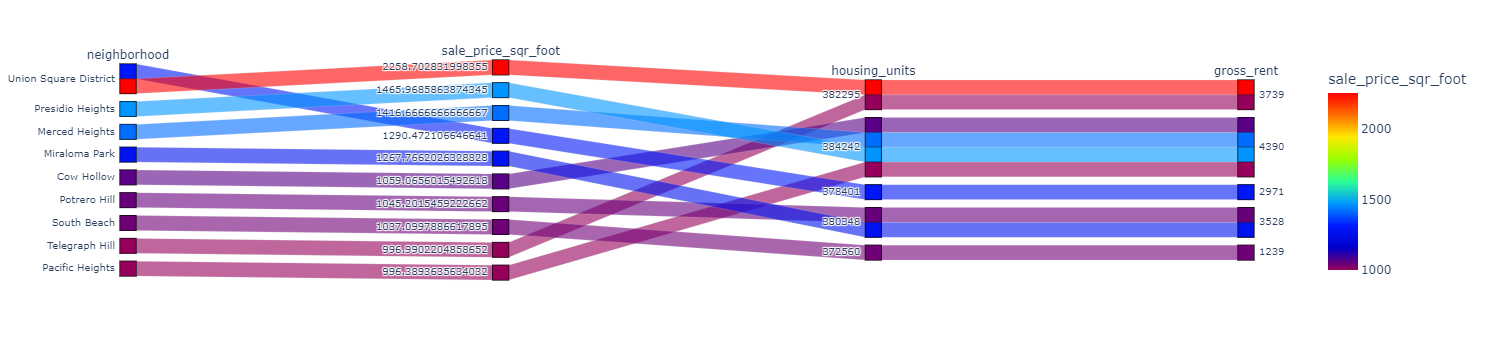

In [23]:
# Parallel Categories Plot
px.parallel_categories(
    all_data_for_expensive_neighbohoods.head(10),
    dimensions=["neighborhood","sale_price_sqr_foot","housing_units","gross_rent"],
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Rainbow    
)

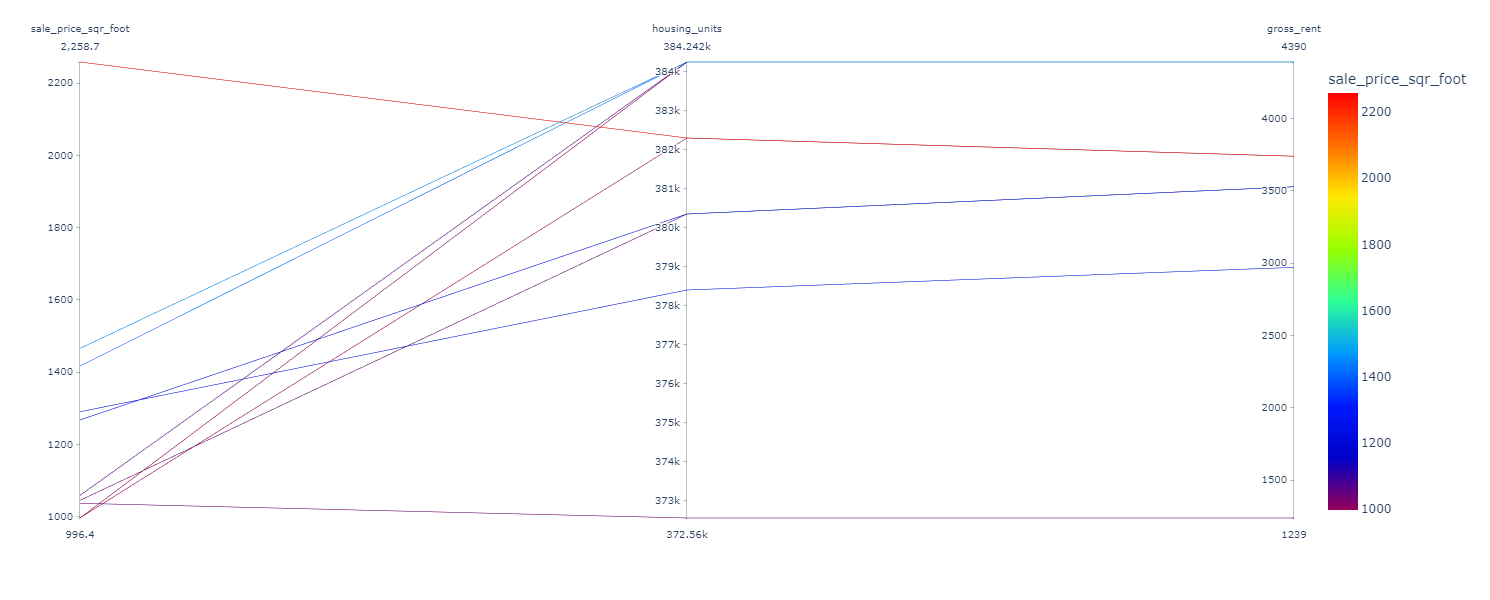

In [24]:
# Parallel Coordinates Plot
px.parallel_coordinates(all_data_for_expensive_neighbohoods.head(10), 
                        dimensions=["neighborhood","sale_price_sqr_foot","housing_units","gross_rent"], 
                        height=600, 
                        width= 1200, 
                        color_continuous_scale=px.colors.sequential.Rainbow,
                        color='sale_price_sqr_foot')

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

In [25]:
#get the data for most expensive to least expensive neighborhoods
all_data_for_expensive_neighbohoods=all_data_for_expensive_neighbohoods.dropna().round(2)
all_data_for_expensive_neighbohoods.sample()


neighborhood  sale_price_sqr_foot  housing_units  gross_rent
year                                                              
2011  Potrero Hill               503.14         374507        1530

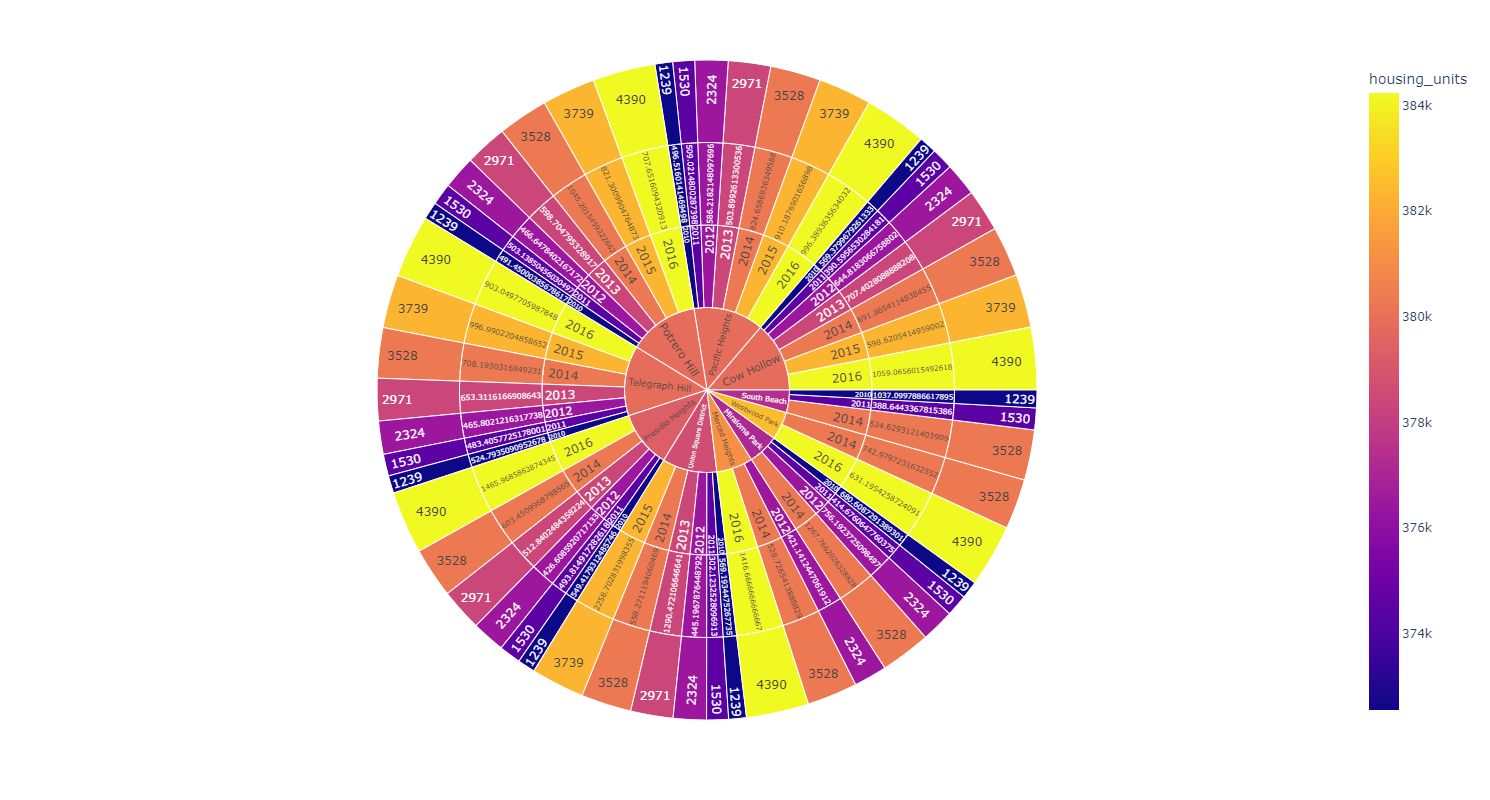

In [28]:
# Sunburst Plot
plot_sunburst= px.sunburst(all_data_for_expensive_neighbohoods.reset_index(), 
                           path=['neighborhood','year','sale_price_sqr_foot','gross_rent'], 
                           values='gross_rent',
                           width=800, height=800, 
                           color='housing_units', 
                           maxdepth = -1)
plot_sunburst.show()